# Spam Detection 
## A Binary Classification Approach 

<br>

## Exploratory Data Analysis 

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# load data set 
df = pd.read_csv("SMSSpamCollection", sep="\t", header=None, names=["label", "message"])


In [34]:
df.head(10)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [35]:
df.shape

(5572, 2)

In [36]:
# check null values & data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB




 label
ham     4825
spam     747
Name: count, dtype: int64 


------------------------------------------------------------------------------------------------------------------------


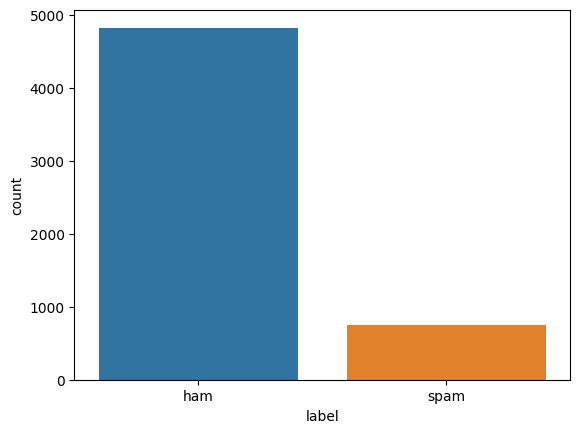

In [37]:
# check label ( spam & ham )  frequency 
print("\n\n", df.value_counts("label"),"\n\n")
print("--"*60)
sns.countplot(data=df, x="label", hue="label")
plt.show()


In [38]:
# Convert target data ( Label ) to numeric feature
# Map labels and Assign spam = 1 , ham = 0 

df["label"]=df["label"].map({"spam":1 , "ham":0})

In [39]:
# Check label data type again
df["label"].dtypes

dtype('int64')

In [40]:
# Clean message contents from extra space, numbers and punctuations

import re

def clean_txt(text):
    text=text.lower() # lower case 
    text = re.sub(r"[^\w\s]", " ", text)    # Remove all punctuations
    text = re.sub(r"\d+", " ", text)        # Remove numbers
    text = " ".join(text.split())           # Remove extra spaces
    return text          
df['cleaned_message'] = df['message'].apply(clean_txt)    

In [41]:
# print samples after cleaning the messages 
print(df['cleaned_message'].sample(5))

3087    i wish that i was with you holding you tightly...
697     aight you close by or still down around alex s...
1195                                              ok c ya
1535                                 remember on that day
2979    yar lor keep raining non stop or u wan go else...
Name: cleaned_message, dtype: object


<br>

In [42]:
# Summarizing messaage content 
# Message length descriptive statistics of message length based on labels 
df["clean_message_length"]=df['cleaned_message'].apply(len)
df[["label","clean_message_length"]].groupby('label').describe()

clean_message_length                                                   \
                     count        mean        std  min    25%    50%    75%   
label                                                                         
0                   4825.0   67.381554  55.242186  0.0   31.0   50.0   88.0   
1                    747.0  115.760375  26.447837  4.0  106.0  123.0  132.0   

              
         max  
label         
0      907.0  
1      182.0

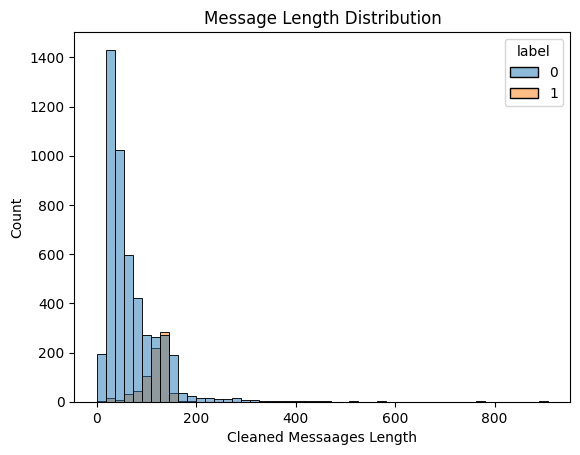

In [43]:
# Visualization : Message Length Distribution for both labels 
sns.histplot(df, x=df["clean_message_length"], bins=50, hue="label")
plt.xlabel("Cleaned Messaages Length")
plt.title("Message Length Distribution")
plt.show()

## Key insights from EDA

The **Average length of spam messages** (115.76 characters) is almost **twice as long as non-spam messages** (67.38 characters)

The median (50th percentile) for spam (123 characters) is also much higher than for non-spam (50 characters)

**Spam** message lengths are **tightly concentrated** between 106 - 132 characters (IQR)

**The standard deviation** (26.44) of spam messages is much lower than that of non-spam messages (55.24), meaning spam messages tend to have similar lengths. highly likely due to Many spam messages follow a specific structure pre-written templates

Most non-spam messages are shorter than 100 characters, The **peak is around 50 characters**

Spam messages show a clear **peak around 120-140 characters** suggests a consistent length pattern

<br><br>

## Text Feature Extraction (TF-IDF ) 

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english', max_features=3000)  # Limit features to top 3000 words
X = tfidf.fit_transform(df['cleaned_message'])

In [45]:
# split data into training and test
y=df["label"]
from sklearn.model_selection import train_test_split

# Split dataset (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Building Classifier Models (Logistic Regression, Naïve Bayes)

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [47]:
# Building a Logistic Regression model
clf = LogisticRegression(penalty='l2')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

cm = metrics.confusion_matrix(y_test, y_pred)
acc = metrics.accuracy_score(y_test, y_pred)
pre = metrics.precision_score(y_test, y_pred)
rec = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
print('--'*50)
print(cm,'        ',np.round(acc,4),'           ',np.round(pre,4),'               ',np.round(rec,4),'          ',np.round(f1,4))
print('confusion matrix,  accurac,           precision,          recall,           F1 score')
print('--'*50)

----------------------------------------------------------------------------------------------------
[[965   1]
 [ 34 115]]          0.9686             0.9914                 0.7718            0.8679
confusion matrix,  accurac,           precision,          recall,           F1 score
----------------------------------------------------------------------------------------------------


In [48]:
# Building a  Naïve Bayes model
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

cm = metrics.confusion_matrix(y_test, y_pred)
acc = metrics.accuracy_score(y_test, y_pred)
pre = metrics.precision_score(y_test, y_pred)
rec = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

print('--'*50)
print(cm,'        ',np.round(acc,4),'           ',np.round(pre,4),'               ',np.round(rec,4),'          ',np.round(f1,4))
print('confusion matrix,  accuracy,          precision,          recall,           F1 score')
print('--'*50)

----------------------------------------------------------------------------------------------------
[[966   0]
 [ 27 122]]          0.9758             1.0                 0.8188            0.9004
confusion matrix,  accuracy,          precision,          recall,           F1 score
----------------------------------------------------------------------------------------------------


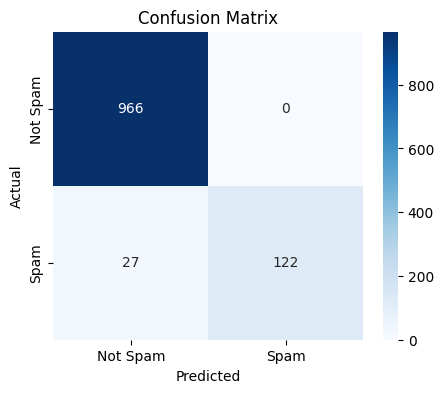

In [49]:
# Plot Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Not Spam", "Spam"], yticklabels=["Not Spam", "Spam"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### Result explaination : 

**Naïve Bayes’ perfect precision**, meaning it never misclassifies a non-spam as spam!

Naïve Bayes assumes word independence and uses word probabilities, making it work exceptionally well with sparse data 

like TF-IDF. Result: It performs well in spam detection

Naïve Bayes, handles class imbalance better by relying on word probabilities